# Fogify + Kind 

## Import FogifySDK, connect with controller, and import "fogified" `docker-compose` file

In [1]:
from FogifySDK import FogifySDK
fogify = FogifySDK("http://controller:5000", "kind-docker-compose.yaml")

## Deploy the topology
While the system deploys the topology, a progress bar illustrates the current status.

In [2]:
fogify.deploy()

Deploy process: 100%|██████████| 4/4 [00:10<00:00,  2.53s/it]


{'message': "The services are deployed ( {'control-plane': 1, 'worker-0': 1, 'worker-1': 1, 'worker-2': 1} )"}

## Retrieve the monitoring metrics from running instances
Fogify allows users to retrieve monitoring metrics in `pandas` dataframes.
The latter helps in depicting:

### Tables of values

In [3]:
fogify.get_metrics_from('control-plane_1')

,cpu_util,cpu,memory,memory_util,disk_bytes,network_rx_internet,network_tx_internet,count
timestamp,,,,,,,,
2021-01-23 11:07:38,0.000000,3.145855e+07,3.538944e+06,0.082397,0.0,0.0,0.0,0
2021-01-23 11:07:44,24.016486,4.481727e+09,1.382687e+08,3.219318,102400.0,0.0,0.0,1
2021-01-23 11:07:50,7.260809,5.930015e+09,1.844470e+08,4.294491,102400.0,0.0,0.0,2
2021-01-23 11:07:56,30.121868,1.167641e+10,6.827909e+08,15.897465,102400.0,0.0,0.0,3
2021-01-23 11:07:59,41.697557,1.692180e+10,9.839698e+08,22.909832,102400.0,0.0,0.0,4
2021-01-23 11:08:06,12.308998,1.943361e+10,9.693102e+08,22.568512,102400.0,4692.0,14381.0,5
2021-01-23 11:08:11,14.362977,2.200741e+10,1.067930e+09,24.864674,102400.0,5454.0,21650.0,6
2021-01-23 11:08:16,16.974911,2.467483e+10,1.153040e+09,26.846313,102400.0,6186.0,28745.0,7
2021-01-23 11:08:22,7.974813,2.618435e+10,1.156682e+09,26.931095,102400.0,6918.0,35840.0,8


### Differences in out-going network data size

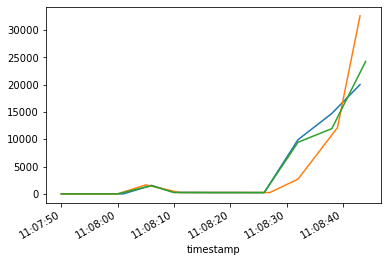

In [4]:
fogify.get_metrics_from('worker-0_1').network_tx_internet.diff().plot()
fogify.get_metrics_from('worker-1_1').network_tx_internet.diff().plot()
fogify.get_metrics_from('worker-2_1').network_tx_internet.diff().plot()

### Timelines

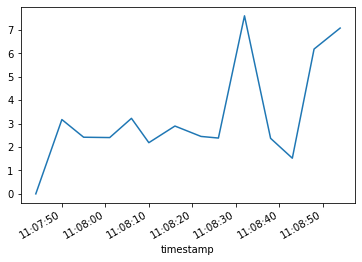

In [5]:
fogify.get_metrics_from('worker-0_1').cpu_util.plot()

### Update link connectivity 
We can update the connectivity between two nodes at run-time through the `update_link` function. The following command will inject to the (`worker-1`,`control-plane`) link a `50ms` network delay at uplink and `50ms` downlink in both nodes (`bidirectional=true`). So at the end, the `rtt` between these nodes will be `200ms`.

In [6]:
fogify.update_link('internet', 'worker-1', 'control-plane',{'uplink':{'latency':{'delay': '50ms'}}, 'downlink':{'latency':{'delay': '50ms'}}}, True)

{'worker-1': {'message': 'OK'}, 'control-plane': {'message': 'OK'}}

## Undeploy
Finally, the FogifySDK provides the `undeploy` method that destroys the emulated infrastructure.

In [7]:
fogify.undeploy()

Undeploy process: 100%|██████████| 4/4 [00:25<00:00,  6.36s/it]


{'message': 'The 4 services are undeployed'}